In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)  # show all columns

In [2]:
df = pd.read_csv("../data/detroit_open_data_portal_property_sales.csv")

df["Sale Date"] = pd.to_datetime(df["Sale Date"])
# Extract month and year
df["month"] = df["Sale Date"].dt.month
df["year"] = df["Sale Date"].dt.year

df.head(3)

c:\Users\matt\Desktop\DataProjects\detroit_property_prices\venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (19,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Sales ID,Parcel ID,Address,Sale Date,Sale Price,Grantor,Grantee,Liber Page,Terms of Sale,Sale Verification,Sale Instrument,sale_number,Property Transfer Percentage,Multi Parcel Sale,Property Class Code,Property Class Description,ECF Neighborhood,Neighborhood,Council District,Zip Code,Street Number,Street Prefix,Street Name,Street Type,Unit Number,Longitude,Latitude,ObjectId,x,y,month,year
0,1355623,27070821.,8050 PIEDMONT,2011-06-27,3600,HUD,"DARBY, BRENT",NaN,19-MULTI PARCEL ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,1,100,True,702.0,RETIRED REAL PROPERTY SPECIAL ACT,RET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,6,2011
1,1355625,27070821.,8050 PIEDMONT,2011-03-18,1,WAYNE COUNTY SHERIFF,HUD,NaN,19-MULTI PARCEL ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,1,0,True,702.0,RETIRED REAL PROPERTY SPECIAL ACT,RET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN,3,2011
2,1357110,27070408.,18266 HUBBELL,2011-04-01,11000,HUD,"LYNCH, YVETTE",49135:156-157,19-MULTI PARCEL ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,1,100,True,702.0,RETIRED REAL PROPERTY SPECIAL ACT,RET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,NaN,NaN,4,2011


In [3]:
# Basic statistics
print(df.shape)
print(f"Number of unique Sales: {df['Sales ID'].nunique()}")

# Get earliest and latest dates
print(f"Earliest sales date: {df['Sale Date'].min()}")
print(f"Most recent sales date: {df['Sale Date'].max()}")
print("--------------------")

# Number of NaN values per column
print(f"NaN values (% of rows) per column:\n{(df.isna().sum() / len(df) * 100).round(2)}%")
print("--------------------")


(495578, 32)
Number of unique Sales: 495578
Earliest sales date: 2011-01-01 00:00:00
Most recent sales date: 2025-09-12 00:00:00
--------------------
NaN values (% of rows) per column:
Sales ID                         0.00
Parcel ID                        0.25
Address                          0.03
Sale Date                        0.00
Sale Price                       0.00
Grantor                          0.03
Grantee                          0.34
Liber Page                      41.64
Terms of Sale                    0.00
Sale Verification                0.27
Sale Instrument                  0.00
sale_number                      0.00
Property Transfer Percentage     0.00
Multi Parcel Sale                0.00
Property Class Code              0.03
Property Class Description       1.87
ECF Neighborhood                 0.03
Neighborhood                     5.82
Council District                 5.82
Zip Code                         2.77
Street Number                    1.81
Street Prefix    

## Sales Over Time

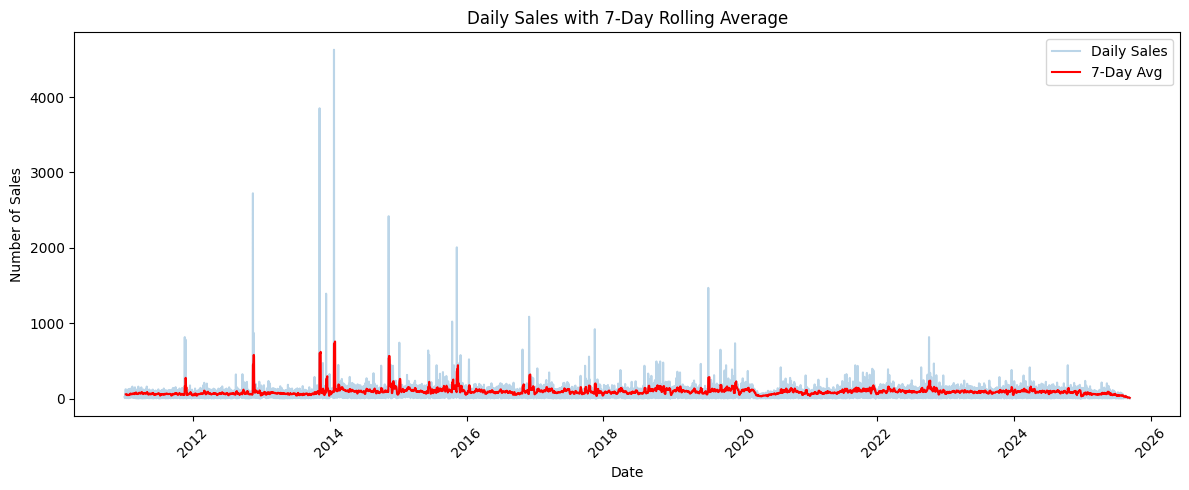

In [47]:
# Daily
sales_by_day = df.groupby("Sale Date")["Sales ID"].count().reset_index()
sales_by_day["rolling_7d"] = sales_by_day["Sales ID"].rolling(7).mean()

plt.figure(figsize=(12,5))
plt.plot(sales_by_day["Sale Date"], sales_by_day["Sales ID"], alpha=0.3, label="Daily Sales")  # faded raw
plt.plot(sales_by_day["Sale Date"], sales_by_day["rolling_7d"], color="red", label="7-Day Avg")   # smoothed
plt.title("Daily Sales with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [50]:
top_10_days = sales_by_day.sort_values(by="Sales ID", ascending=False).head(20)
print("Average sales per day:", sales_by_day["Sales ID"].mean())
top_10_days

Average sales per day: 92.70071081182192


,Sale Date,Sales ID,rolling_7d
1113,2014-01-23,4627,729.14
1037,2013-11-07,3851,599.57
682,2012-11-16,2723,448.71
1405,2014-11-11,2419,532.14
1769,2015-11-10,2006,355.86
3112,2019-07-15,1468,277.43
1072,2013-12-12,1391,254.43
2155,2016-11-30,1085,200.71
1744,2015-10-16,1021,209.57
2506,2017-11-16,920,187.29


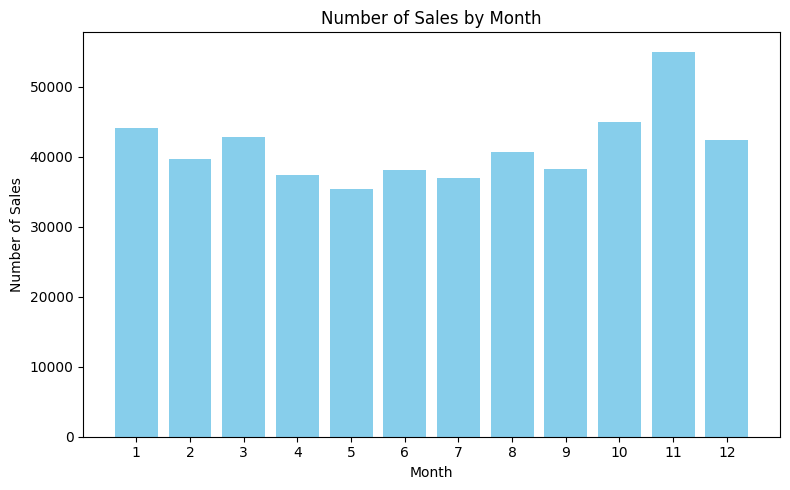

In [ ]:
# Group by month only
sales_by_month = df.groupby("month")["Sales ID"].count().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(sales_by_month["month"], sales_by_month["Sales ID"], color="skyblue")

plt.title("Number of Sales by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(range(1,13))  # show months 1–12
plt.tight_layout()
plt.show()

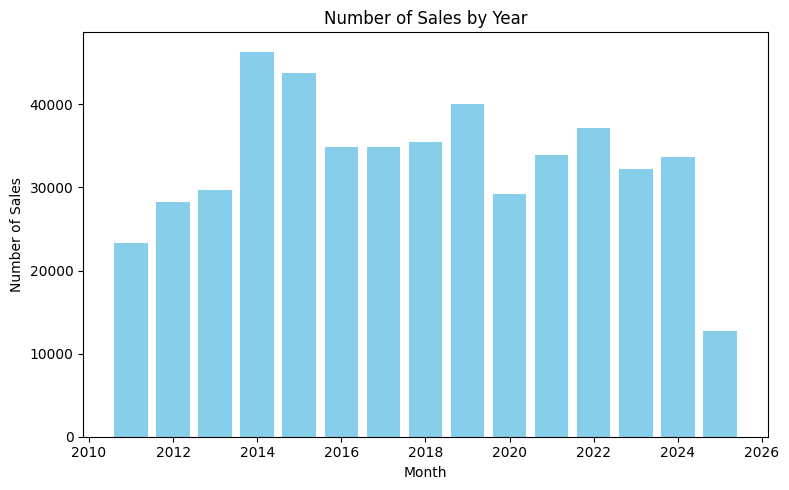

In [ ]:
# Group by year only
sales_by_year = df.groupby("year")["Sales ID"].count().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(sales_by_year["year"], sales_by_year["Sales ID"], color="skyblue")

plt.title("Number of Sales by Year")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

## Sales Price

In [21]:
# Price of Sales
pd.set_option("display.float_format", "{:.2f}".format)
percentiles = [0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]
print(df['Sale Price'].describe(percentiles=percentiles))
print("------------------")

print("Largest n sales in Detroit Dataset")
print(df[['Address', 'Sale Date', 'Sale Price']].sort_values(by='Sale Price', ascending=False).head(20))


count      495578.00
mean        83751.22
std       3099401.79
min             0.00
1%              0.00
5%              0.00
10%             0.00
25%             1.00
50%          1840.00
75%         30853.00
90%         99997.30
95%        200000.00
99%        890000.00
max     700000000.00
Name: Sale Price, dtype: float64
------------------
Largest n sales in Detroit Dataset
                  Address  Sale Date  Sale Price
360427  569 MONROE UNIT 2 2019-05-23   700000000
262191    1200 ST ANTOINE 2019-05-23   700000000
262204         588 MACOMB 2019-05-23   700000000
262172         508 MONROE 2019-05-23   700000000
298939                NaN 2019-05-23   700000000
262196    555 E LAFAYETTE 2019-05-23   700000000
262184         562 MONROE 2019-05-23   700000000
262177         570 MONROE 2019-05-23   700000000
262210         500 MACOMB 2019-05-23   700000000
23340   1000 WOODWARD AVE 2014-12-31   142000000
416013        6800 MILLER 2021-12-22   110000000
416022        6525 MILLER 2020-

The 0.9th percentile threshold is: $99,997.30


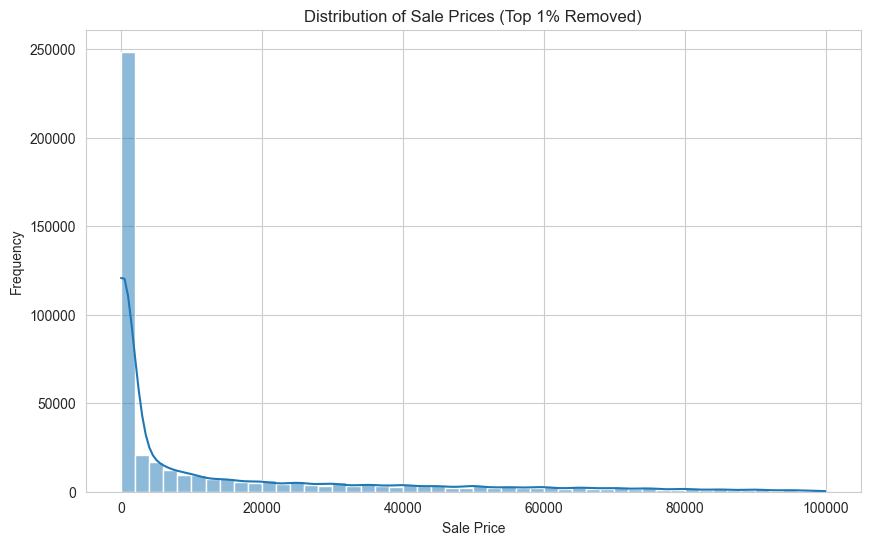

In [24]:
## The Max Sale Price is throwing off the plot... since removed to anythhing less than the 99th percentile
quantile =.90
upper_limit = df['Sale Price'].quantile(quantile)
print(f"The {quantile}th percentile threshold is: ${upper_limit:,.2f}")

df_trimmed = df[df['Sale Price'] < upper_limit]

plt.figure(figsize=(10, 6))
sns.histplot(df_trimmed['Sale Price'], bins=50, kde=True)
plt.title('Distribution of Sale Prices (Top 1% Removed)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

c:\Users\matt\Desktop\DataProjects\detroit_property_prices\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


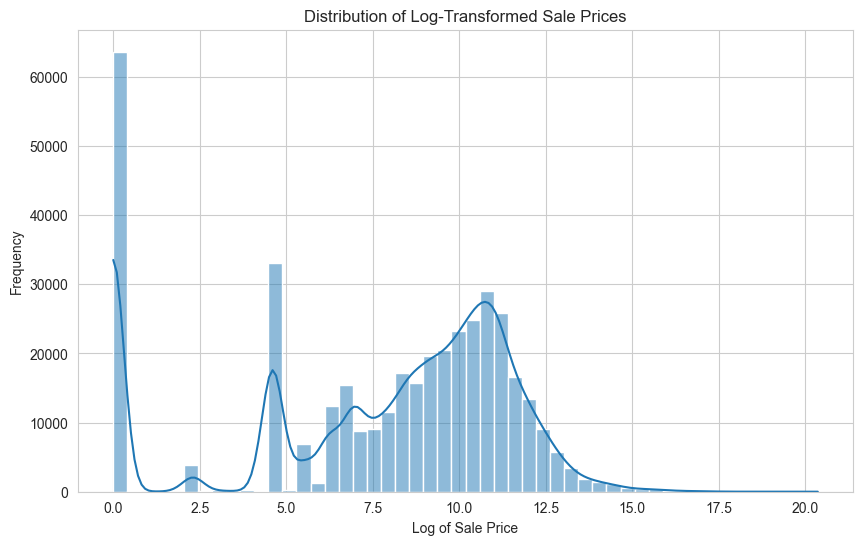

In [ ]:
# Distrubution of the Sale Price (Outlier is skewing the plot)
plt.figure(figsize=(10, 6))
df['Log Sale Price'] = np.log(df['Sale Price'])
sns.histplot(df['Log Sale Price'], kde=True, bins=50)
plt.title('Distribution of Log-Transformed Sale Prices')
plt.xlabel('Log of Sale Price')
plt.ylabel('Frequency')
plt.show()

In [4]:
df.head(3)

,Sales ID,Parcel ID,Address,Sale Date,Sale Price,Grantor,Grantee,Liber Page,Terms of Sale,Sale Verification,Sale Instrument,sale_number,Property Transfer Percentage,Multi Parcel Sale,Property Class Code,Property Class Description,ECF Neighborhood,Neighborhood,Council District,Zip Code,Street Number,Street Prefix,Street Name,Street Type,Unit Number,Longitude,Latitude,ObjectId,x,y,month,year
0,1355623,27070821.,8050 PIEDMONT,2011-06-27,3600,HUD,"DARBY, BRENT",NaN,19-MULTI PARCEL ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,1,100,True,702.0,RETIRED REAL PROPERTY SPECIAL ACT,RET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,6,2011
1,1355625,27070821.,8050 PIEDMONT,2011-03-18,1,WAYNE COUNTY SHERIFF,HUD,NaN,19-MULTI PARCEL ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,1,0,True,702.0,RETIRED REAL PROPERTY SPECIAL ACT,RET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN,3,2011
2,1357110,27070408.,18266 HUBBELL,2011-04-01,11000,HUD,"LYNCH, YVETTE",49135:156-157,19-MULTI PARCEL ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,1,100,True,702.0,RETIRED REAL PROPERTY SPECIAL ACT,RET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,NaN,NaN,4,2011
